# 🔍 Deep Data Exploration - Processed Drone Dataset

## Overview
This notebook performs a **comprehensive, step-by-step exploration** of the preprocessed drone fault detection dataset.

## Analysis Steps:
1. **File Inventory** - Identify all processed data files and their sizes
2. **Feature Data Loading** - Load and analyze X_windows.npy (time series features)
3. **Label Analysis** - Load and examine y_fault, y_sev, y_type labels
4. **Metadata Inspection** - Review fault mappings and normalization statistics
5. **Feature Distributions** - Statistical analysis of each feature
6. **Visualization** - Histograms and box plots of feature values
7. **Class Balance** - Assess label distribution and potential imbalances
8. **Temporal Patterns** - Analyze time series behavior and autocorrelations
9. **Cross-Label Analysis** - Examine relationships between different label types
10. **Feature Separability** - Identify which features best discriminate between classes
11. **Dimensionality Reduction** - PCA and t-SNE visualizations
12. **Correlation Analysis** - Feature correlation matrix and redundancy detection
13. **Summary Report** - Final recommendations for modeling

## Expected Outputs:
- Statistical summaries and quality checks
- Multiple visualizations (distributions, time series, scatter plots, heatmaps)
- Feature importance rankings
- Modeling recommendations

---

Let's begin! 👇

In [12]:
import os
import glob
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [13]:
DATA_DIR = r"d:\Cours\A5\S9\BI Pipeline\ESILV_IBM_Hackathon_Team13\data_processed"
print(f"Data directory: {DATA_DIR}")
print(f"Directory exists: {os.path.exists(DATA_DIR)}")

Data directory: d:\Cours\A5\S9\BI Pipeline\ESILV_IBM_Hackathon_Team13\data_processed
Directory exists: True


# Step 1: Data Discovery - File Inventory

In [14]:
# List all files in the processed data directory
import json

files_info = []
for filename in os.listdir(DATA_DIR):
    filepath = os.path.join(DATA_DIR, filename)
    file_size = os.path.getsize(filepath)
    file_ext = os.path.splitext(filename)[1]
    
    files_info.append({
        'filename': filename,
        'extension': file_ext,
        'size_mb': file_size / (1024 * 1024),
        'size_bytes': file_size
    })

df_files_info = pd.DataFrame(files_info)
df_files_info = df_files_info.sort_values('size_mb', ascending=False)

print("="*80)
print("PROCESSED DATA FILES INVENTORY")
print("="*80)
print(df_files_info.to_string(index=False))
print(f"\nTotal data size: {df_files_info['size_mb'].sum():.2f} MB")
print(f"Number of files: {len(df_files_info)}")

PROCESSED DATA FILES INVENTORY
               filename extension     size_mb  size_bytes
          X_windows.npy      .npy 1687.204865  1769162528
            y_fault.npy      .npy    0.152122      159512
              y_sev.npy      .npy    0.152122      159512
             y_type.npy      .npy    0.152122      159512
normalization_stats.npz      .npz    0.003388        3553
fault_type_mapping.json     .json    0.000068          71

Total data size: 1687.66 MB
Number of files: 6


# Step 2: Load Feature Data (X_windows.npy)

In [15]:
# Load the windowed features
X_windows = np.load(os.path.join(DATA_DIR, 'X_windows.npy'))

print("="*80)
print("FEATURE DATA (X_windows)")
print("="*80)
print(f"Shape: {X_windows.shape}")
print(f"  - Number of samples: {X_windows.shape[0]}")
print(f"  - Window length (time steps): {X_windows.shape[1]}")
print(f"  - Number of features per time step: {X_windows.shape[2]}")
print(f"\nData type: {X_windows.dtype}")
print(f"Memory usage: {X_windows.nbytes / (1024**2):.2f} MB")
print(f"\nValue ranges:")
print(f"  Min: {X_windows.min():.4f}")
print(f"  Max: {X_windows.max():.4f}")
print(f"  Mean: {X_windows.mean():.4f}")
print(f"  Std: {X_windows.std():.4f}")
print(f"\nContains NaN: {np.isnan(X_windows).any()}")
print(f"Contains Inf: {np.isinf(X_windows).any()}")

FEATURE DATA (X_windows)
Shape: (19923, 100, 111)
  - Number of samples: 19923
  - Window length (time steps): 100
  - Number of features per time step: 111

Data type: float64
Memory usage: 1687.20 MB

Value ranges:
  Min: nan
  Min: nan
  Max: nan
  Max: nan
  Mean: nan
  Mean: nan
  Std: nan
  Std: nan

Contains NaN: True

Contains NaN: True
Contains Inf: False
Contains Inf: False


# Step 3: Load and Analyze Labels

In [16]:
# Load all label arrays
y_fault = np.load(os.path.join(DATA_DIR, 'y_fault.npy'))
y_sev = np.load(os.path.join(DATA_DIR, 'y_sev.npy'))
y_type = np.load(os.path.join(DATA_DIR, 'y_type.npy'))

print("="*80)
print("LABEL ARRAYS")
print("="*80)

labels_info = {
    'y_fault (Fault Classification)': y_fault,
    'y_sev (Severity Level)': y_sev,
    'y_type (Trajectory Type)': y_type
}

for name, labels in labels_info.items():
    print(f"\n{name}:")
    print(f"  Shape: {labels.shape}")
    print(f"  Unique values: {np.unique(labels)}")
    print(f"  Value counts:")
    unique, counts = np.unique(labels, return_counts=True)
    for val, count in zip(unique, counts):
        percentage = (count / len(labels)) * 100
        print(f"    Class {val}: {count} samples ({percentage:.1f}%)")

# Verify alignment
print(f"\n{'='*80}")
print("DATA ALIGNMENT CHECK")
print(f"{'='*80}")
print(f"X_windows samples: {X_windows.shape[0]}")
print(f"y_fault samples:   {y_fault.shape[0]}")
print(f"y_sev samples:     {y_sev.shape[0]}")
print(f"y_type samples:    {y_type.shape[0]}")
print(f"\nAll aligned: {X_windows.shape[0] == y_fault.shape[0] == y_sev.shape[0] == y_type.shape[0]}")

LABEL ARRAYS

y_fault (Fault Classification):
  Shape: (19923,)
  Unique values: [0 1]
  Value counts:
    Class 0: 6110 samples (30.7%)
    Class 1: 13813 samples (69.3%)

y_sev (Severity Level):
  Shape: (19923,)
  Unique values: [0 1 2 3]
  Value counts:
    Class 0: 6110 samples (30.7%)
    Class 1: 4629 samples (23.2%)
    Class 2: 4611 samples (23.1%)
    Class 3: 4573 samples (23.0%)

y_type (Trajectory Type):
  Shape: (19923,)
  Unique values: [0 1 2 3]
  Value counts:
    Class 0: 6110 samples (30.7%)
    Class 1: 4589 samples (23.0%)
    Class 2: 4604 samples (23.1%)
    Class 3: 4620 samples (23.2%)

DATA ALIGNMENT CHECK
X_windows samples: 19923
y_fault samples:   19923
y_sev samples:     19923
y_type samples:    19923

All aligned: True


# Step 4: Load Metadata (Mappings and Normalization Stats)

In [18]:
# Load fault type mapping
with open(os.path.join(DATA_DIR, 'fault_type_mapping.json'), 'r') as f:
    fault_mapping = json.load(f)

print("="*80)
print("FAULT TYPE MAPPING")
print("="*80)
print(json.dumps(fault_mapping, indent=2))

# Load normalization statistics
norm_stats = np.load(os.path.join(DATA_DIR, 'normalization_stats.npz'), allow_pickle=True)

print(f"\n{'='*80}")
print("NORMALIZATION STATISTICS")
print(f"{'='*80}")
print(f"Available arrays: {list(norm_stats.keys())}")

for key in norm_stats.keys():
    data = norm_stats[key]
    print(f"\n{key}:")
    print(f"  Shape: {data.shape}")
    print(f"  Data type: {data.dtype}")
    if len(data.shape) == 1:  # 1D array, show some values
        print(f"  First 5 values: {data[:5]}")
        print(f"  Last 5 values: {data[-5:]}")

FAULT TYPE MAPPING
{
  "none": 0,
  "crack": 1,
  "edge_cut": 2,
  "surface_cut": 3
}

NORMALIZATION STATISTICS
Available arrays: ['mean', 'std', 'columns']

mean:
  Shape: (111,)
  Data type: float64
  First 5 values: [-0.01342365 -0.00205883  1.32717214 -0.00169232  0.01188702]
  Last 5 values: [ 6.06510232e-03  1.17409012e+01  1.90944091e-02 -1.43442431e-02
  6.10415541e-03]

std:
  Shape: (111,)
  Data type: float64
  First 5 values: [0.02105368 0.02346889 0.86777705 0.09262506 0.1054228 ]
  Last 5 values: [0.03397321 3.77382694 0.025385   0.02044639 0.02575559]

columns:
  Shape: (111,)
  Data type: object
  First 5 values: ['q_1' 'q_2' 'q_3' 'q_4' 'q_5']
  Last 5 values: ['stab_16' 'stab_17' 'stab_18' 'stab_19' 'stab_20']


# Step 5: Deep Dive - Feature Distribution Analysis

In [19]:
# Analyze each feature across all windows and time steps
n_features = X_windows.shape[2]

print("="*80)
print(f"PER-FEATURE STATISTICS (across all {X_windows.shape[0]} samples and {X_windows.shape[1]} time steps)")
print("="*80)

feature_stats = []
for i in range(n_features):
    feature_data = X_windows[:, :, i].flatten()
    
    stats = {
        'feature_idx': i,
        'mean': np.mean(feature_data),
        'std': np.std(feature_data),
        'min': np.min(feature_data),
        'max': np.max(feature_data),
        'median': np.median(feature_data),
        'q25': np.percentile(feature_data, 25),
        'q75': np.percentile(feature_data, 75),
        'range': np.max(feature_data) - np.min(feature_data),
        'zeros_pct': (feature_data == 0).sum() / len(feature_data) * 100
    }
    feature_stats.append(stats)

df_feature_stats = pd.DataFrame(feature_stats)

# Display summary
print("\nFeature Statistics Summary:")
print(df_feature_stats.to_string())

# Identify potentially problematic features
print(f"\n{'='*80}")
print("FEATURE QUALITY CHECKS")
print(f"{'='*80}")

# Features with high percentage of zeros
high_zeros = df_feature_stats[df_feature_stats['zeros_pct'] > 50]
if len(high_zeros) > 0:
    print(f"\n⚠️  Features with >50% zeros: {list(high_zeros['feature_idx'])}")
else:
    print(f"\n✓ No features with >50% zeros")

# Features with very low variance
low_variance = df_feature_stats[df_feature_stats['std'] < 0.01]
if len(low_variance) > 0:
    print(f"⚠️  Features with very low variance (std < 0.01): {list(low_variance['feature_idx'])}")
else:
    print(f"✓ All features have reasonable variance")

# Features with extreme ranges
print(f"\nFeature with largest range: Feature {df_feature_stats.loc[df_feature_stats['range'].idxmax(), 'feature_idx']} (range: {df_feature_stats['range'].max():.4f})")
print(f"Feature with smallest range: Feature {df_feature_stats.loc[df_feature_stats['range'].idxmin(), 'feature_idx']} (range: {df_feature_stats['range'].min():.4f})")

PER-FEATURE STATISTICS (across all 19923 samples and 100 time steps)

Feature Statistics Summary:
     feature_idx      mean           std         min          max    median       q25       q75        range  zeros_pct
0              0 -0.001244  1.003512e+00  -15.557623     9.748183 -0.013319 -0.206428  0.198043    25.305806        0.0
1              1 -0.001783  1.003831e+00   -9.893264     9.381203 -0.079119 -0.346773  0.288856    19.274466        0.0
2              2 -0.003759  9.937493e-01   -1.625661     2.612441 -0.086622 -0.862084  0.751328     4.238102        0.0
3              3  0.000379  1.000585e+00  -47.089095    21.941659  0.001742 -0.191686  0.193927    69.030754        0.0
4              4  0.000070  1.000604e+00  -22.410560    41.276039  0.001414 -0.232002  0.232636    63.686599        0.0
5              5  0.000411  1.003312e+00  -39.184783    16.111479  0.007646 -0.050030  0.053272    55.296262        0.0
6              6 -0.000144  9.936426e-01  -99.131180   136.324

# Step 6: Visualize Feature Distributions

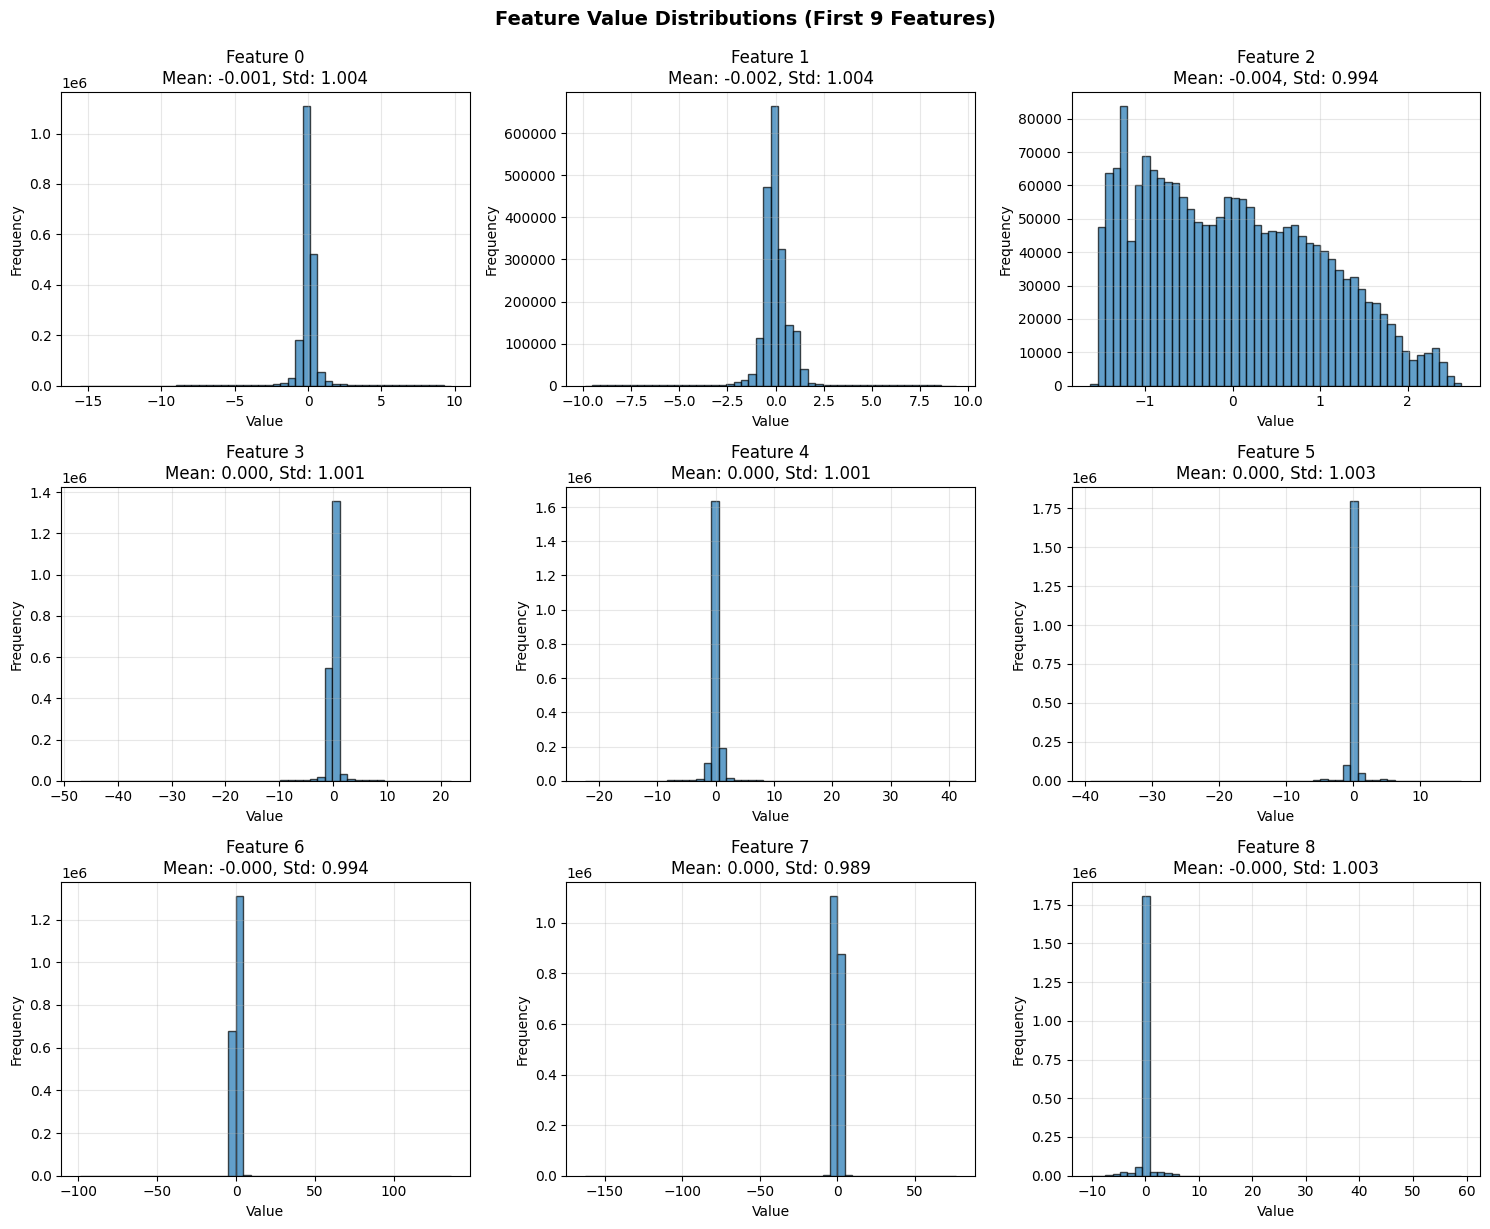

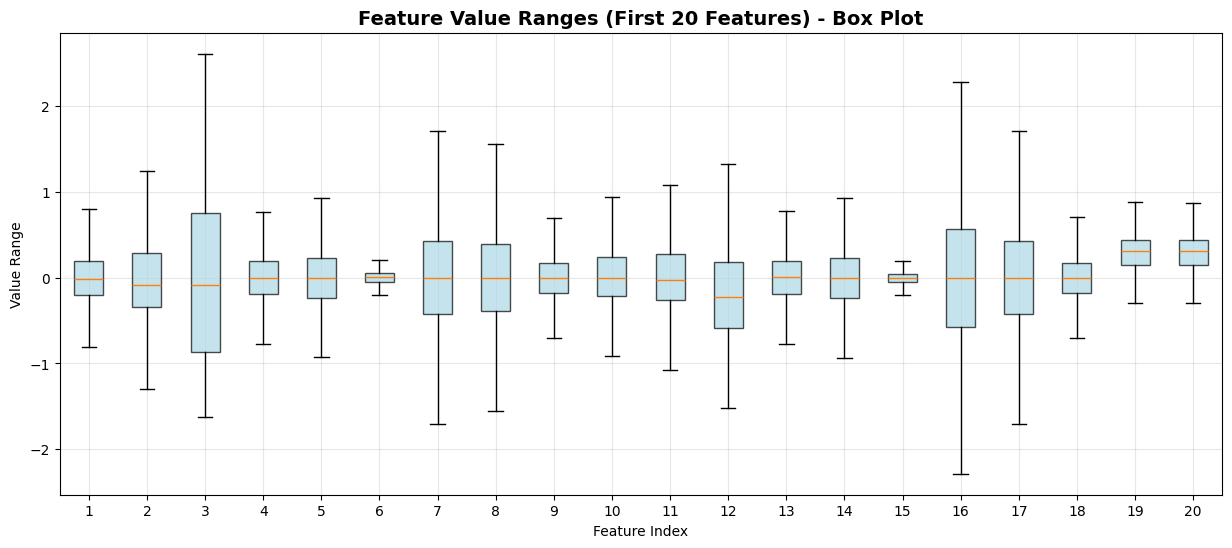

In [20]:
# Plot distribution of first few features
n_features_to_plot = min(9, n_features)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i in range(n_features_to_plot):
    feature_data = X_windows[:, :, i].flatten()
    
    axes[i].hist(feature_data, bins=50, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Feature {i}\nMean: {np.mean(feature_data):.3f}, Std: {np.std(feature_data):.3f}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Feature Value Distributions (First 9 Features)', y=1.02, fontsize=14, fontweight='bold')
plt.show()

# Box plots for feature comparison
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
feature_data_list = [X_windows[:, :, i].flatten() for i in range(min(n_features, 20))]
bp = ax.boxplot(feature_data_list, patch_artist=True, showfliers=False)

for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
    patch.set_alpha(0.7)

ax.set_xlabel('Feature Index')
ax.set_ylabel('Value Range')
ax.set_title('Feature Value Ranges (First 20 Features) - Box Plot', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.show()

# Step 7: Class Distribution and Balance Analysis

C:\Users\jules\AppData\Local\Temp\ipykernel_15776\2546111034.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  bars = axes[idx].bar(unique, counts, color=plt.cm.get_cmap(cmap)(0.6), edgecolor='black', linewidth=1.5)


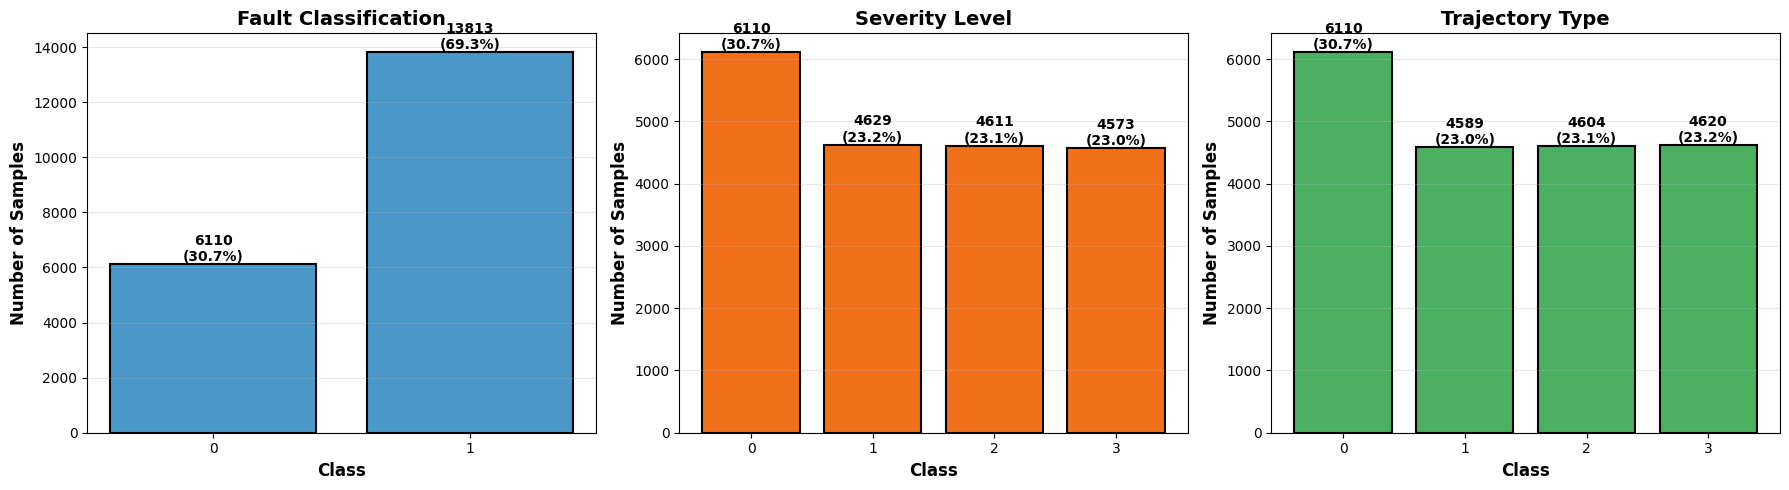

CLASS IMBALANCE ANALYSIS

Fault:
  Number of classes: 2
  Imbalance ratio (max/min): 2.26
  ⚠️  MODERATE IMBALANCE - May need class weights

Severity:
  Number of classes: 4
  Imbalance ratio (max/min): 1.34
  ✓ Well balanced

Trajectory Type:
  Number of classes: 4
  Imbalance ratio (max/min): 1.33
  ✓ Well balanced


In [21]:
# Visualize class distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

label_data = [
    (y_fault, 'Fault Classification', 'Blues'),
    (y_sev, 'Severity Level', 'Oranges'),
    (y_type, 'Trajectory Type', 'Greens')
]

for idx, (labels, title, cmap) in enumerate(label_data):
    unique, counts = np.unique(labels, return_counts=True)
    percentages = (counts / len(labels)) * 100
    
    # Create bar plot
    bars = axes[idx].bar(unique, counts, color=plt.cm.get_cmap(cmap)(0.6), edgecolor='black', linewidth=1.5)
    
    # Add value labels on bars
    for i, (bar, count, pct) in enumerate(zip(bars, counts, percentages)):
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                      f'{count}\n({pct:.1f}%)',
                      ha='center', va='bottom', fontweight='bold')
    
    axes[idx].set_xlabel('Class', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Number of Samples', fontsize=12, fontweight='bold')
    axes[idx].set_title(title, fontsize=14, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].set_xticks(unique)

plt.tight_layout()
plt.show()

# Calculate class imbalance metrics
print("="*80)
print("CLASS IMBALANCE ANALYSIS")
print("="*80)

for labels, title in [(y_fault, 'Fault'), (y_sev, 'Severity'), (y_type, 'Trajectory Type')]:
    unique, counts = np.unique(labels, return_counts=True)
    imbalance_ratio = counts.max() / counts.min()
    
    print(f"\n{title}:")
    print(f"  Number of classes: {len(unique)}")
    print(f"  Imbalance ratio (max/min): {imbalance_ratio:.2f}")
    
    if imbalance_ratio > 3:
        print(f"  ⚠️  HIGH IMBALANCE - Consider using class weights or resampling")
    elif imbalance_ratio > 1.5:
        print(f"  ⚠️  MODERATE IMBALANCE - May need class weights")
    else:
        print(f"  ✓ Well balanced")

# Step 8: Temporal Pattern Analysis - Time Series Behavior

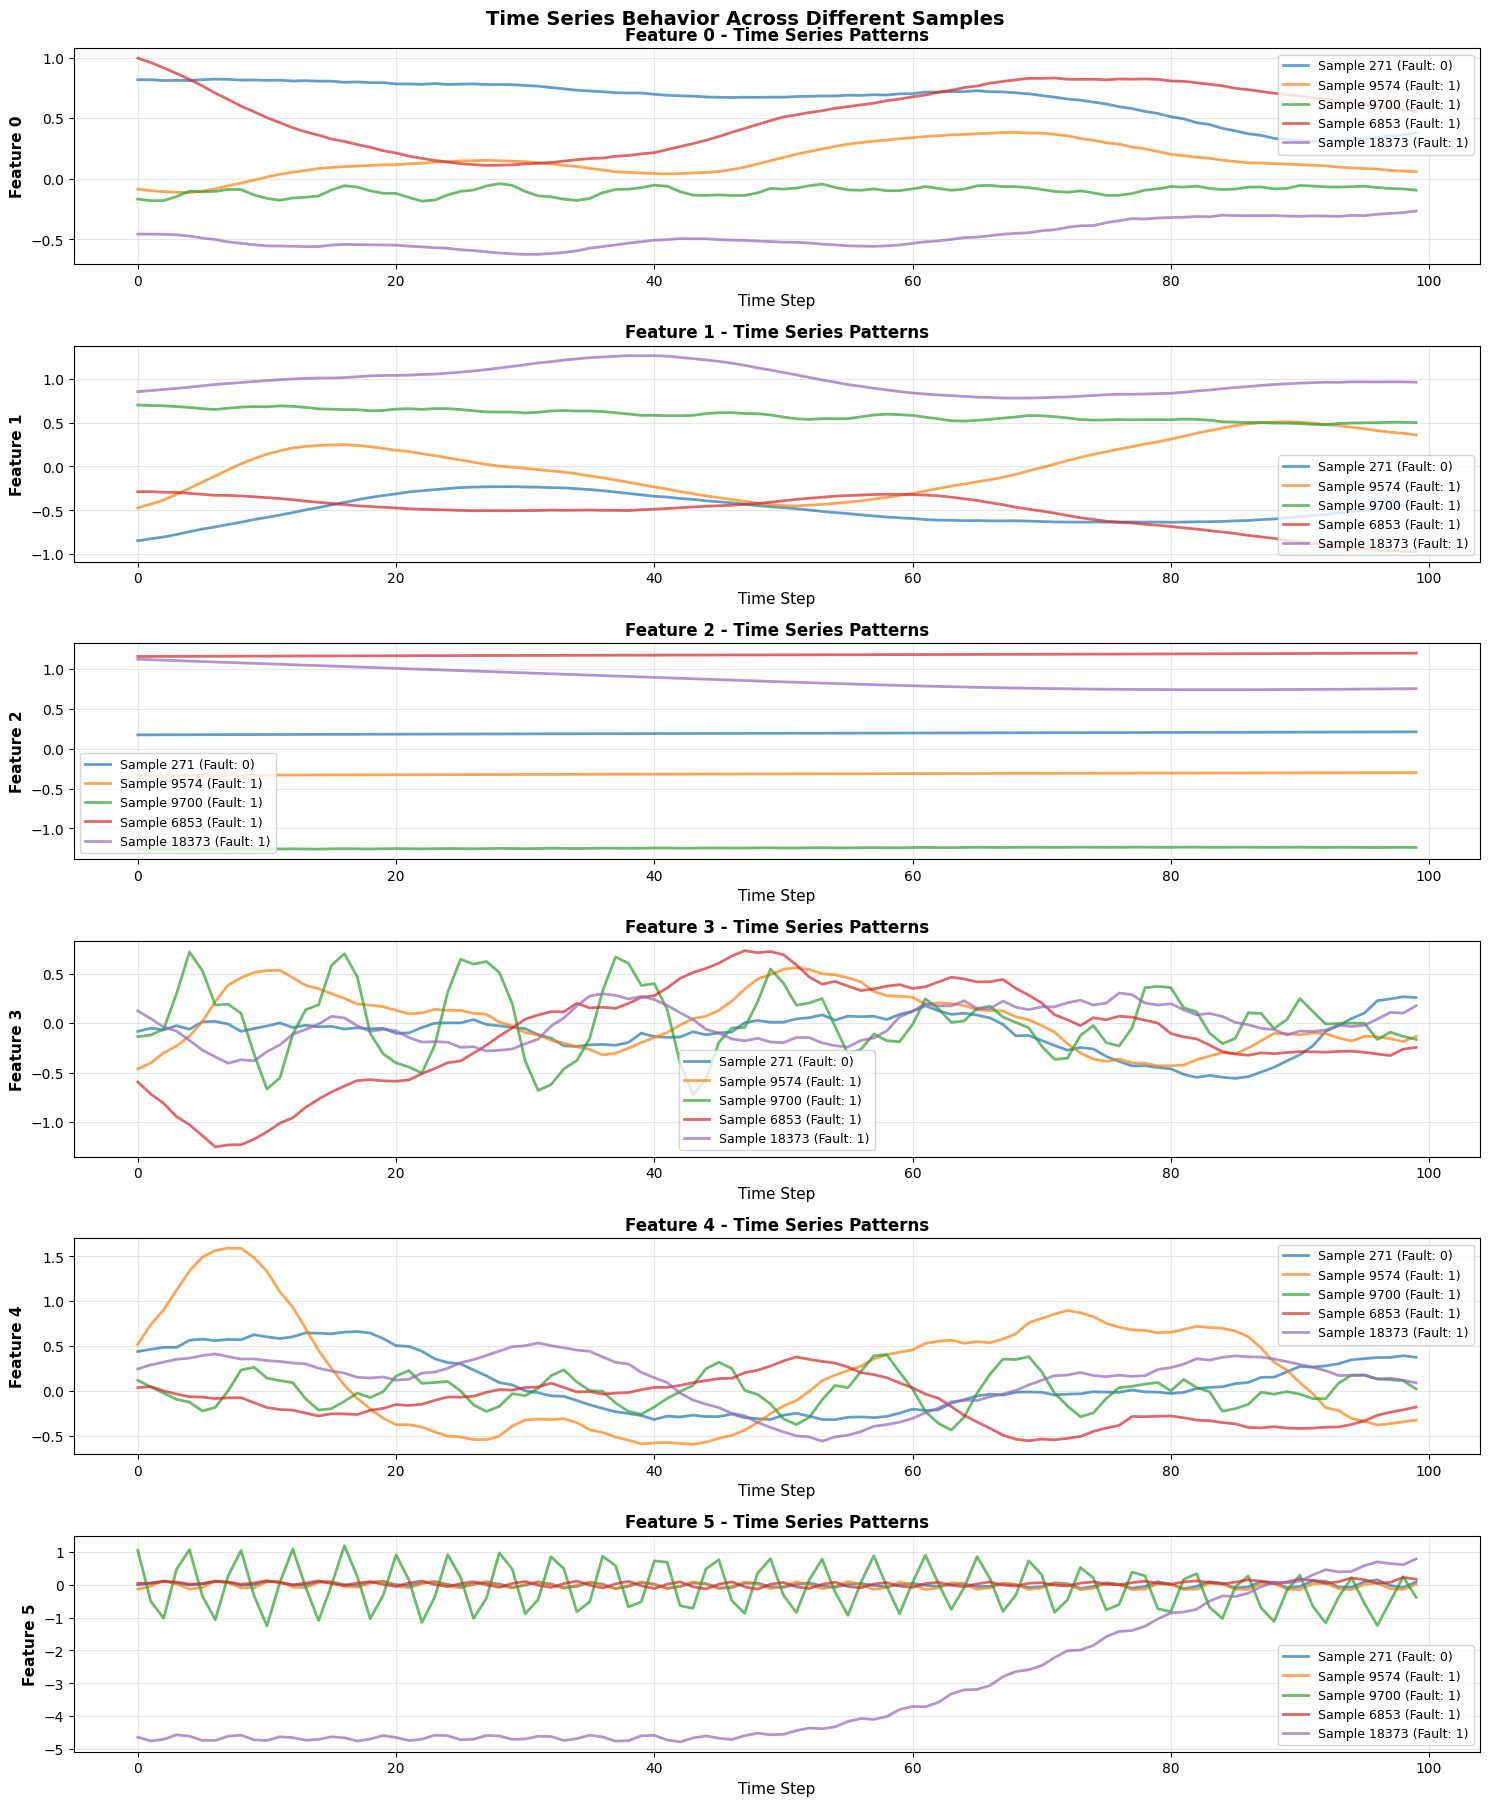

TEMPORAL STATISTICS

Feature 0:
  Average autocorrelation (lag-1): 0.9770
  Average temporal std deviation: 0.2930

Feature 0:
  Average autocorrelation (lag-1): 0.9770
  Average temporal std deviation: 0.2930

Feature 1:
  Average autocorrelation (lag-1): 0.9940
  Average temporal std deviation: 0.3244

Feature 1:
  Average autocorrelation (lag-1): 0.9940
  Average temporal std deviation: 0.3244

Feature 2:
  Average autocorrelation (lag-1): 0.9979
  Average temporal std deviation: 0.0158

Feature 2:
  Average autocorrelation (lag-1): 0.9979
  Average temporal std deviation: 0.0158

Feature 3:
  Average autocorrelation (lag-1): 0.9202
  Average temporal std deviation: 0.4883

Feature 3:
  Average autocorrelation (lag-1): 0.9202
  Average temporal std deviation: 0.4883

Feature 4:
  Average autocorrelation (lag-1): 0.9378
  Average temporal std deviation: 0.5406

Feature 4:
  Average autocorrelation (lag-1): 0.9378
  Average temporal std deviation: 0.5406


In [22]:
# Analyze time series patterns - plot sample windows
n_samples_to_plot = 5
n_features_to_plot = min(6, n_features)

fig, axes = plt.subplots(n_features_to_plot, 1, figsize=(15, 3*n_features_to_plot))
if n_features_to_plot == 1:
    axes = [axes]

# Select random samples from different classes
sample_indices = np.random.choice(X_windows.shape[0], n_samples_to_plot, replace=False)

for feat_idx in range(n_features_to_plot):
    for sample_idx in sample_indices:
        time_series = X_windows[sample_idx, :, feat_idx]
        label = y_fault[sample_idx]
        
        axes[feat_idx].plot(time_series, label=f'Sample {sample_idx} (Fault: {label})', alpha=0.7, linewidth=2)
    
    axes[feat_idx].set_ylabel(f'Feature {feat_idx}', fontsize=11, fontweight='bold')
    axes[feat_idx].set_xlabel('Time Step', fontsize=11)
    axes[feat_idx].legend(loc='best', fontsize=9)
    axes[feat_idx].grid(True, alpha=0.3)
    axes[feat_idx].set_title(f'Feature {feat_idx} - Time Series Patterns', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.suptitle('Time Series Behavior Across Different Samples', y=1.001, fontsize=14, fontweight='bold')
plt.show()

# Calculate temporal statistics
print("="*80)
print("TEMPORAL STATISTICS")
print("="*80)

for feat_idx in range(min(5, n_features)):
    # Calculate autocorrelation at lag 1 for each sample
    autocorr_lag1 = []
    for sample_idx in range(X_windows.shape[0]):
        ts = X_windows[sample_idx, :, feat_idx]
        if len(ts) > 1:
            corr = np.corrcoef(ts[:-1], ts[1:])[0, 1]
            if not np.isnan(corr):
                autocorr_lag1.append(corr)
    
    avg_autocorr = np.mean(autocorr_lag1) if autocorr_lag1 else 0
    
    # Calculate temporal variation
    temporal_std = np.std(X_windows[:, :, feat_idx], axis=1).mean()
    
    print(f"\nFeature {feat_idx}:")
    print(f"  Average autocorrelation (lag-1): {avg_autocorr:.4f}")
    print(f"  Average temporal std deviation: {temporal_std:.4f}")

# Step 9: Cross-Label Correlation Analysis

LABEL RELATIONSHIPS

1. Fault Type vs Severity Level:
severity     0     1     2     3    All
fault                                  
0         6110     0     0     0   6110
1            0  4629  4611  4573  13813
All       6110  4629  4611  4573  19923

2. Fault Type vs Trajectory Type:
trajectory_type     0     1     2     3    All
fault                                         
0                6110     0     0     0   6110
1                   0  4589  4604  4620  13813
All              6110  4589  4604  4620  19923

3. Severity Level vs Trajectory Type:
trajectory_type     0     1     2     3    All
severity                                      
0                6110     0     0     0   6110
1                   0  1533  1539  1557   4629
2                   0  1536  1540  1535   4611
3                   0  1520  1525  1528   4573
All              6110  4589  4604  4620  19923


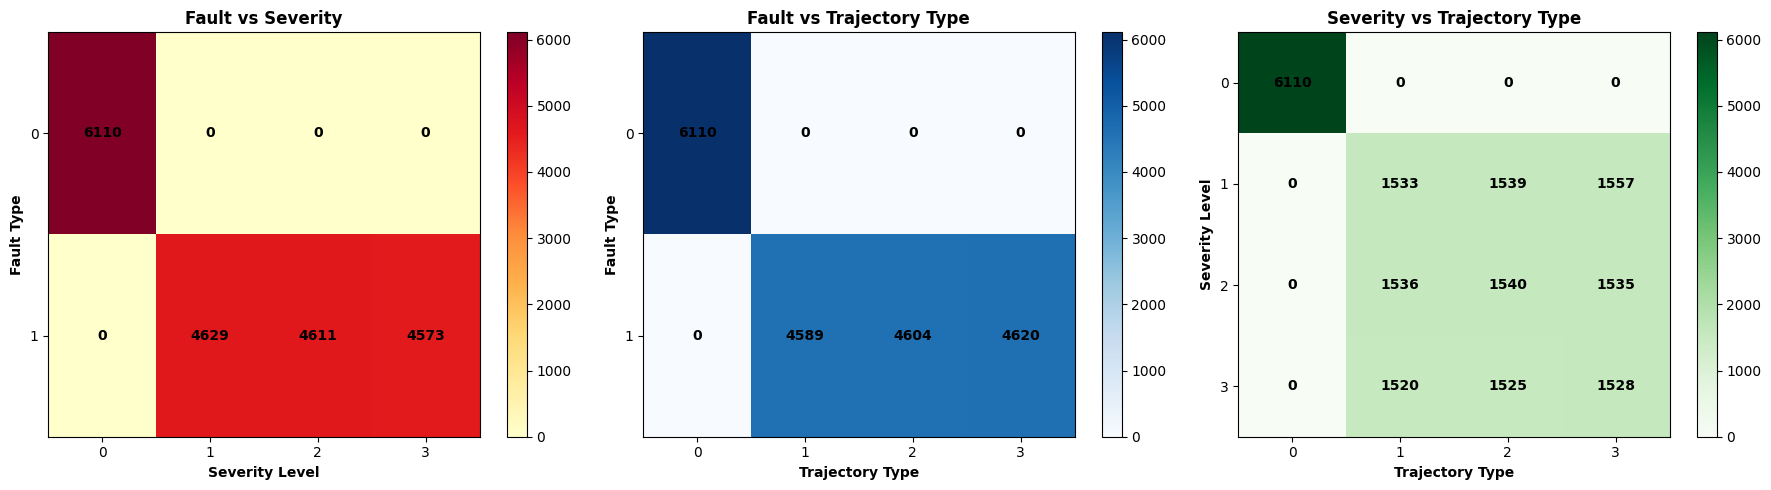

In [23]:
# Create a comprehensive label DataFrame
df_labels = pd.DataFrame({
    'fault': y_fault,
    'severity': y_sev,
    'trajectory_type': y_type
})

print("="*80)
print("LABEL RELATIONSHIPS")
print("="*80)

# Cross-tabulation: Fault vs Severity
print("\n1. Fault Type vs Severity Level:")
ct_fault_sev = pd.crosstab(df_labels['fault'], df_labels['severity'], margins=True)
print(ct_fault_sev)

# Cross-tabulation: Fault vs Trajectory Type
print("\n2. Fault Type vs Trajectory Type:")
ct_fault_traj = pd.crosstab(df_labels['fault'], df_labels['trajectory_type'], margins=True)
print(ct_fault_traj)

# Cross-tabulation: Severity vs Trajectory Type
print("\n3. Severity Level vs Trajectory Type:")
ct_sev_traj = pd.crosstab(df_labels['severity'], df_labels['trajectory_type'], margins=True)
print(ct_sev_traj)

# Visualize label relationships with heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Fault vs Severity
ct1 = pd.crosstab(df_labels['fault'], df_labels['severity'])
im1 = axes[0].imshow(ct1.values, cmap='YlOrRd', aspect='auto')
axes[0].set_xticks(range(len(ct1.columns)))
axes[0].set_yticks(range(len(ct1.index)))
axes[0].set_xticklabels(ct1.columns)
axes[0].set_yticklabels(ct1.index)
axes[0].set_xlabel('Severity Level', fontweight='bold')
axes[0].set_ylabel('Fault Type', fontweight='bold')
axes[0].set_title('Fault vs Severity', fontweight='bold')
for i in range(len(ct1.index)):
    for j in range(len(ct1.columns)):
        axes[0].text(j, i, ct1.values[i, j], ha='center', va='center', fontweight='bold')
plt.colorbar(im1, ax=axes[0])

# Fault vs Trajectory
ct2 = pd.crosstab(df_labels['fault'], df_labels['trajectory_type'])
im2 = axes[1].imshow(ct2.values, cmap='Blues', aspect='auto')
axes[1].set_xticks(range(len(ct2.columns)))
axes[1].set_yticks(range(len(ct2.index)))
axes[1].set_xticklabels(ct2.columns)
axes[1].set_yticklabels(ct2.index)
axes[1].set_xlabel('Trajectory Type', fontweight='bold')
axes[1].set_ylabel('Fault Type', fontweight='bold')
axes[1].set_title('Fault vs Trajectory Type', fontweight='bold')
for i in range(len(ct2.index)):
    for j in range(len(ct2.columns)):
        axes[1].text(j, i, ct2.values[i, j], ha='center', va='center', fontweight='bold')
plt.colorbar(im2, ax=axes[1])

# Severity vs Trajectory
ct3 = pd.crosstab(df_labels['severity'], df_labels['trajectory_type'])
im3 = axes[2].imshow(ct3.values, cmap='Greens', aspect='auto')
axes[2].set_xticks(range(len(ct3.columns)))
axes[2].set_yticks(range(len(ct3.index)))
axes[2].set_xticklabels(ct3.columns)
axes[2].set_yticklabels(ct3.index)
axes[2].set_xlabel('Trajectory Type', fontweight='bold')
axes[2].set_ylabel('Severity Level', fontweight='bold')
axes[2].set_title('Severity vs Trajectory Type', fontweight='bold')
for i in range(len(ct3.index)):
    for j in range(len(ct3.columns)):
        axes[2].text(j, i, ct3.values[i, j], ha='center', va='center', fontweight='bold')
plt.colorbar(im3, ax=axes[2])

plt.tight_layout()
plt.show()

# Step 10: Feature Separability Analysis by Class

FEATURE SEPARABILITY ANALYSIS - Fault Classification

Top features for fault classification (by separability):
 feature_idx  separability_score  mean_range  avg_std
           2            0.176264    0.174152 0.988016
           1            0.037862    0.038583 1.019018
           5            0.034425    0.034826 1.011631
           4            0.017171    0.017565 1.022896
           3            0.011451    0.011836 1.033557
           0            0.007982    0.008186 1.025533
           9            0.002963    0.003043 1.026974
           6            0.001081    0.001137 1.051579
           7            0.000602    0.000621 1.031529
           8            0.000266    0.000266 1.001727

Top features for fault classification (by separability):
 feature_idx  separability_score  mean_range  avg_std
           2            0.176264    0.174152 0.988016
           1            0.037862    0.038583 1.019018
           5            0.034425    0.034826 1.011631
           4         

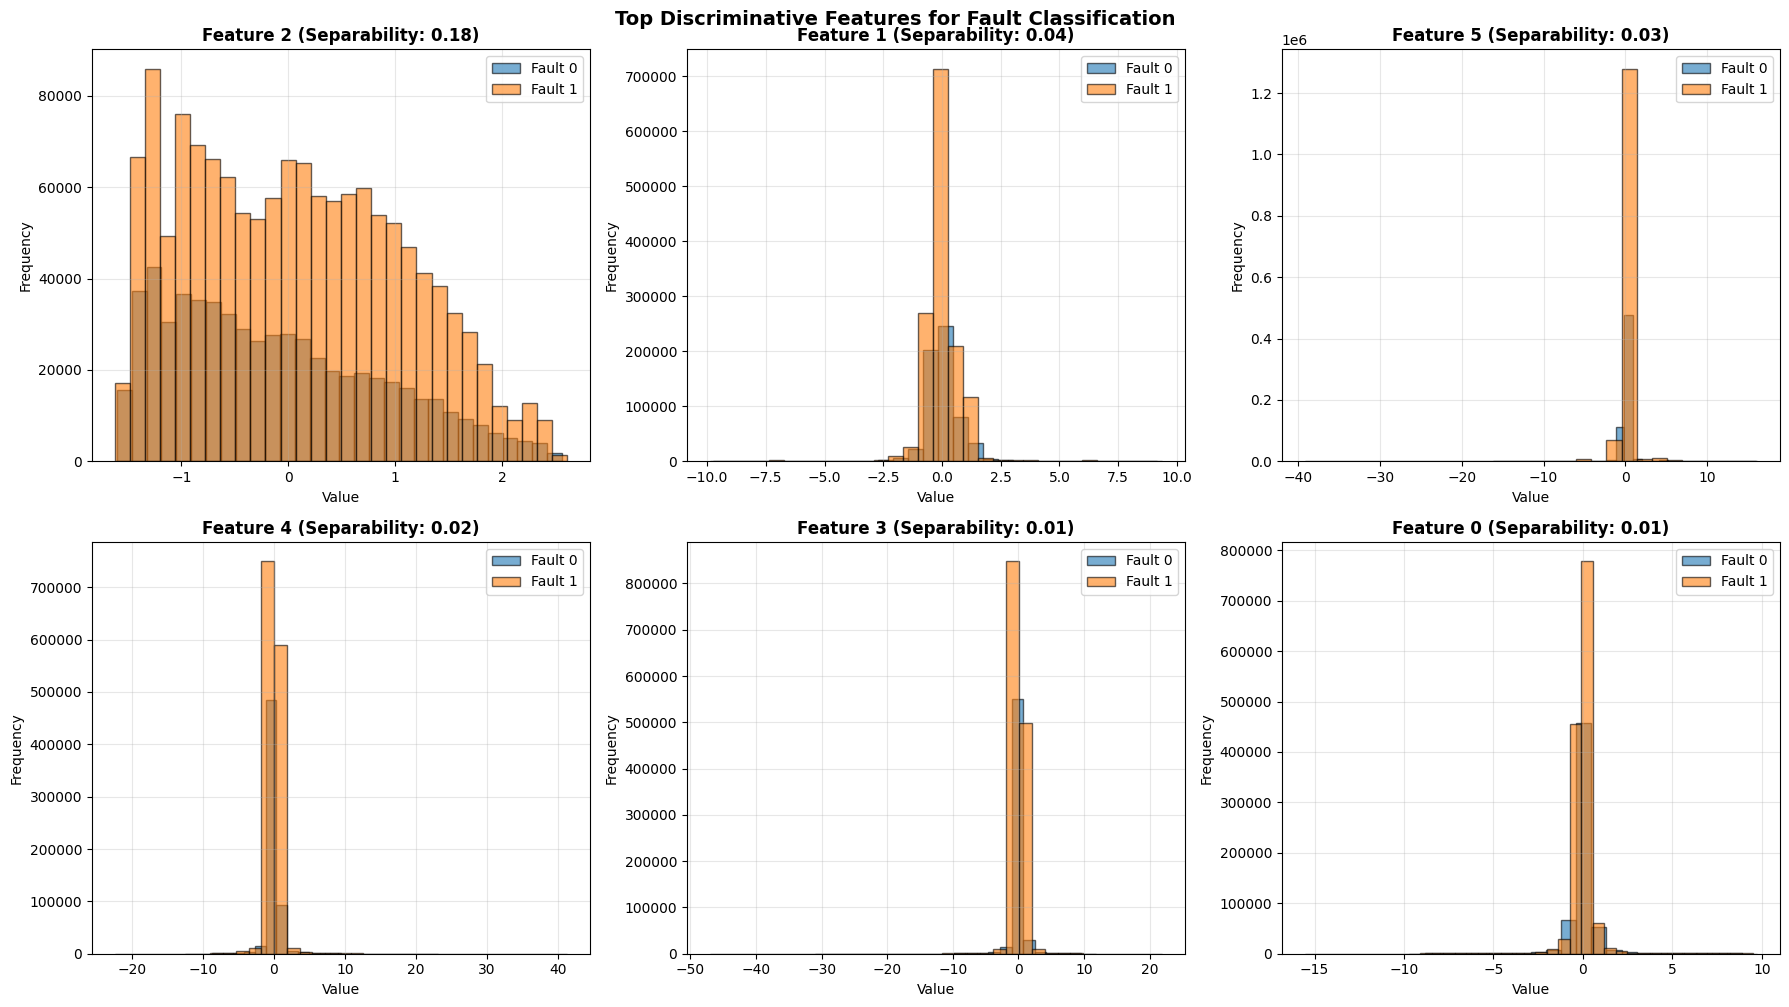

In [24]:
# Analyze how well features separate different fault classes
# Compute mean feature values for each fault class

print("="*80)
print("FEATURE SEPARABILITY ANALYSIS - Fault Classification")
print("="*80)

unique_faults = np.unique(y_fault)
n_features_analyze = min(10, n_features)

# Calculate mean and std for each feature per fault class
separability_scores = []

for feat_idx in range(n_features_analyze):
    class_means = []
    class_stds = []
    
    for fault_class in unique_faults:
        class_mask = y_fault == fault_class
        class_data = X_windows[class_mask, :, feat_idx].flatten()
        class_means.append(np.mean(class_data))
        class_stds.append(np.std(class_data))
    
    # Calculate separability score (range of means / average std)
    mean_range = max(class_means) - min(class_means)
    avg_std = np.mean(class_stds)
    separability = mean_range / avg_std if avg_std > 0 else 0
    
    separability_scores.append({
        'feature_idx': feat_idx,
        'separability_score': separability,
        'mean_range': mean_range,
        'avg_std': avg_std
    })

df_separability = pd.DataFrame(separability_scores).sort_values('separability_score', ascending=False)
print("\nTop features for fault classification (by separability):")
print(df_separability.to_string(index=False))

# Visualize feature distributions by class
top_features = df_separability.head(6)['feature_idx'].values

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feat_idx in enumerate(top_features):
    for fault_class in unique_faults:
        class_mask = y_fault == fault_class
        class_data = X_windows[class_mask, :, feat_idx].flatten()
        
        axes[idx].hist(class_data, bins=30, alpha=0.6, label=f'Fault {fault_class}', edgecolor='black')
    
    sep_score = df_separability[df_separability['feature_idx'] == feat_idx]['separability_score'].values[0]
    axes[idx].set_title(f'Feature {feat_idx} (Separability: {sep_score:.2f})', fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Top Discriminative Features for Fault Classification', y=1.002, fontsize=14, fontweight='bold')
plt.show()

# Step 11: Dimensionality Reduction Visualization (PCA & t-SNE)

DIMENSIONALITY REDUCTION
Original shape: (19923, 100, 111)
Flattened shape would be: (19923, 11100)
Memory required: 1.65 GB

⚠️  Using 1000 samples to avoid memory issues...
Sample flattened shape: (1000, 11100)
Sample memory: 84.69 MB

NaN values found: 102022
⚠️  Handling 102022 NaN values using mean imputation...
Sample flattened shape: (1000, 11100)
Sample memory: 84.69 MB

NaN values found: 102022
⚠️  Handling 102022 NaN values using mean imputation...


c:\Users\jules\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:577: UserWarning: Skipping features without any observed values: [   52   163   274   385   496   607   718   829   940  1051  1162  1273
  1384  1495  1606  1717  1828  1939  2050  2161  2272  2383  2494  2605
  2716  2827  2938  3049  3160  3271  3382  3493  3604  3715  3826  3937
  4048  4159  4270  4381  4492  4603  4714  4825  4936  5047  5158  5269
  5380  5491  5602  5713  5824  5935  6046  6157  6268  6379  6490  6601
  6712  6823  6934  7045  7156  7267  7378  7489  7600  7711  7822  7933
  8044  8155  8266  8377  8488  8599  8710  8821  8932  9043  9154  9265
  9376  9487  9598  9709  9820  9931 10042 10153 10264 10375 10486 10597
 10708 10819 10930 11041]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


✓ NaN values imputed successfully

Performing PCA...
PCA explained variance ratio: [0.21040282 0.06757373]
Total variance explained: 27.80%

Performing t-SNE (this may take a moment)...
PCA explained variance ratio: [0.21040282 0.06757373]
Total variance explained: 27.80%

Performing t-SNE (this may take a moment)...
t-SNE complete!
t-SNE complete!


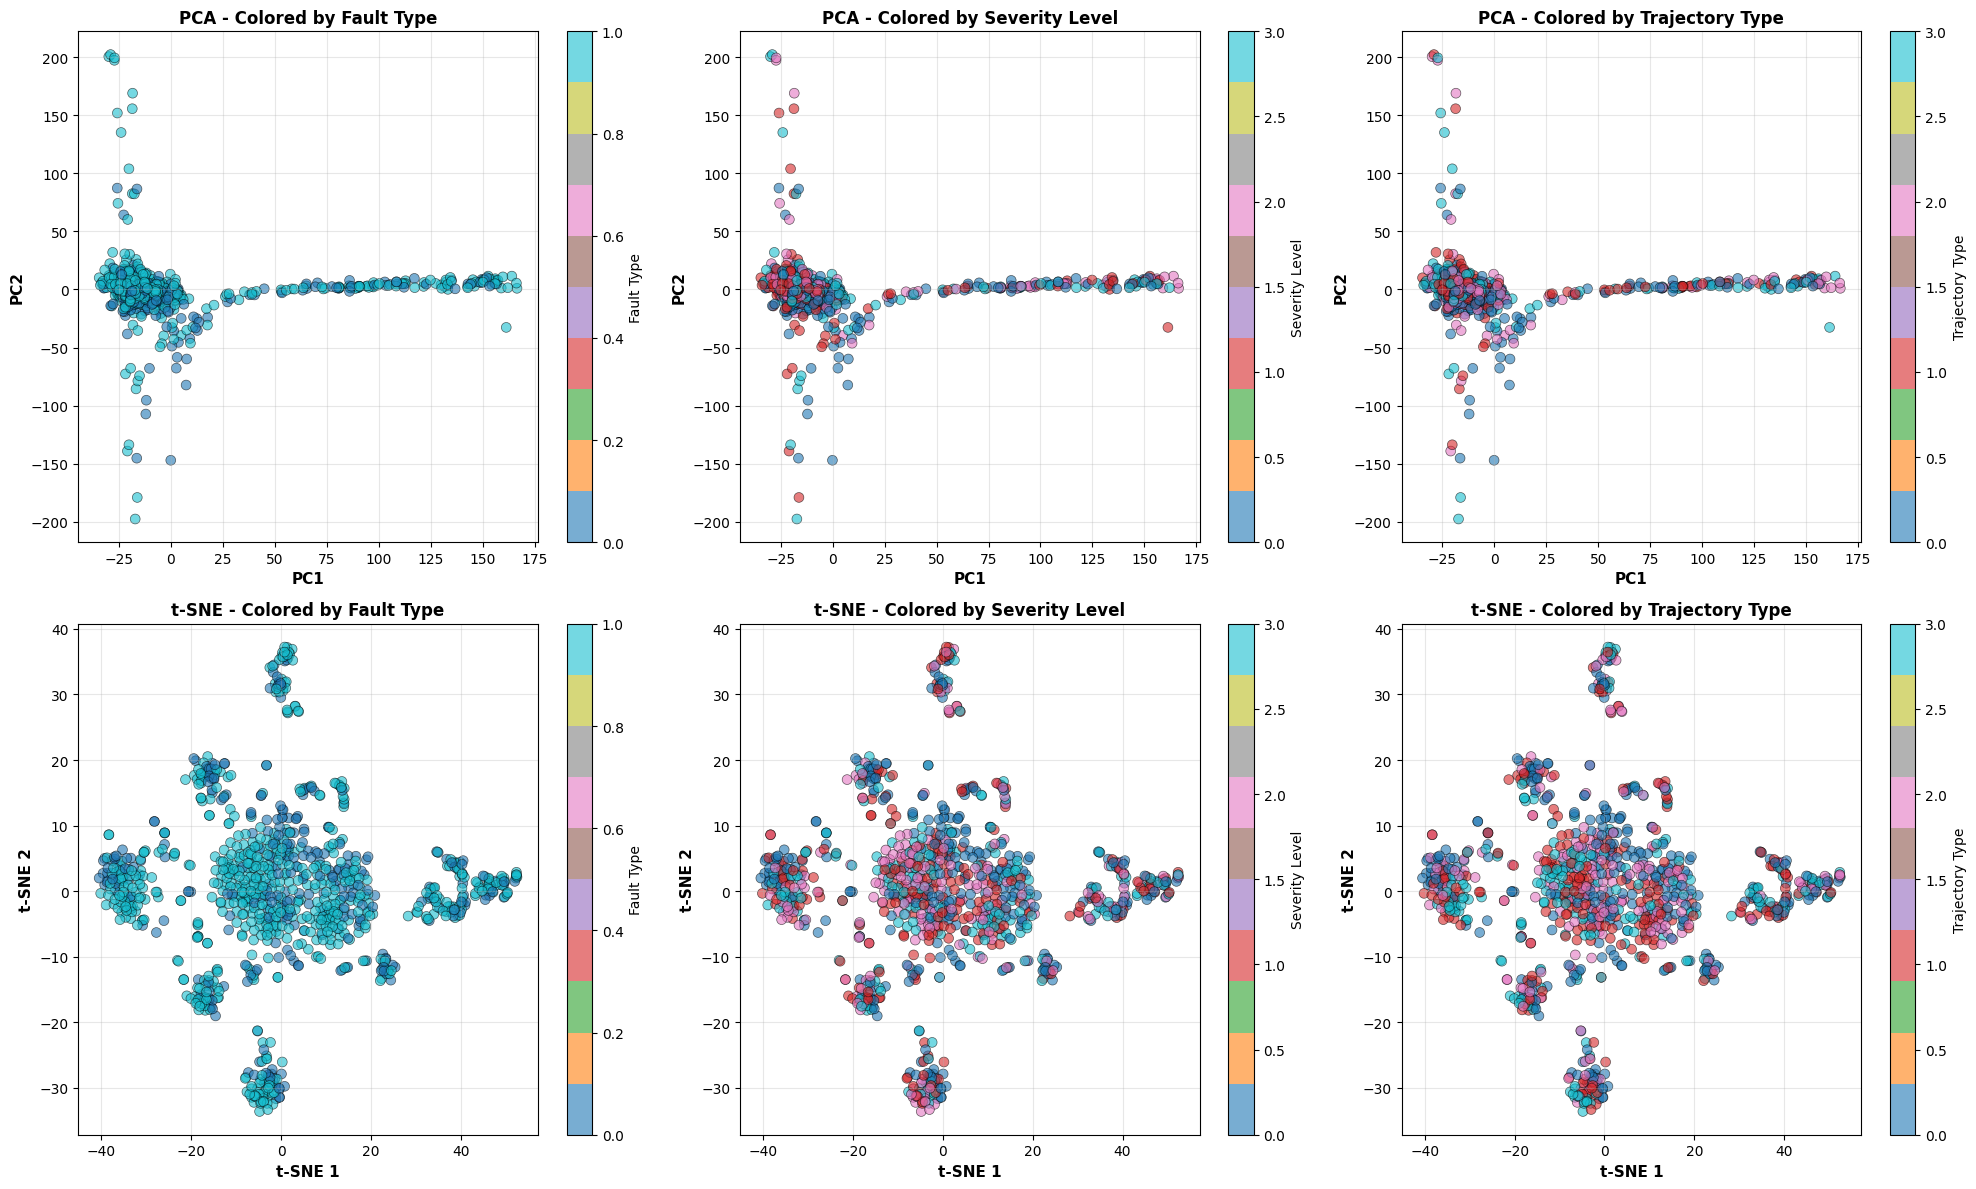


✓ Memory cleaned up


In [28]:
# Flatten the time series windows for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer

print("="*80)
print("DIMENSIONALITY REDUCTION")
print("="*80)
print(f"Original shape: {X_windows.shape}")

# Calculate flattened shape and memory requirements
flattened_shape = (X_windows.shape[0], X_windows.shape[1] * X_windows.shape[2])
memory_gb = (flattened_shape[0] * flattened_shape[1] * 8) / (1024**3)
print(f"Flattened shape would be: {flattened_shape}")
print(f"Memory required: {memory_gb:.2f} GB")

# Use memory-efficient approach: subsample first, then flatten
n_samples_viz = min(1000, X_windows.shape[0])
print(f"\n⚠️  Using {n_samples_viz} samples to avoid memory issues...")

# Sample first to reduce memory footprint
sample_indices = np.random.choice(X_windows.shape[0], n_samples_viz, replace=False)
X_sample_windows = X_windows[sample_indices]
y_fault_sample = y_fault[sample_indices]
y_sev_sample = y_sev[sample_indices]
y_type_sample = y_type[sample_indices]

# Now flatten the smaller sample
X_sample = X_sample_windows.reshape(X_sample_windows.shape[0], -1)
print(f"Sample flattened shape: {X_sample.shape}")
print(f"Sample memory: {(X_sample.nbytes) / (1024**2):.2f} MB")

# Check for NaN values
nan_count = np.isnan(X_sample).sum()
print(f"\nNaN values found: {nan_count}")

if nan_count > 0:
    print(f"⚠️  Handling {nan_count} NaN values using mean imputation...")
    imputer = SimpleImputer(strategy='mean')
    X_sample = imputer.fit_transform(X_sample)
    print("✓ NaN values imputed successfully")

# PCA
print("\nPerforming PCA...")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sample)
print(f"PCA explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.2%}")

# t-SNE
print("\nPerforming t-SNE (this may take a moment)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_sample)
print("t-SNE complete!")

# Visualize
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# PCA plots
scatter_configs = [
    (X_pca, y_fault_sample, 'Fault Type', 'tab10'),
    (X_pca, y_sev_sample, 'Severity Level', 'tab10'),
    (X_pca, y_type_sample, 'Trajectory Type', 'tab10'),
]

for idx, (X_proj, labels, title, cmap) in enumerate(scatter_configs):
    scatter = axes[0, idx].scatter(X_proj[:, 0], X_proj[:, 1], 
                                   c=labels, cmap=cmap, 
                                   alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
    axes[0, idx].set_xlabel('PC1', fontsize=11, fontweight='bold')
    axes[0, idx].set_ylabel('PC2', fontsize=11, fontweight='bold')
    axes[0, idx].set_title(f'PCA - Colored by {title}', fontsize=12, fontweight='bold')
    axes[0, idx].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[0, idx], label=title)

# t-SNE plots
for idx, (X_proj, labels, title, cmap) in enumerate([(X_tsne, y_fault_sample, 'Fault Type', 'tab10'),
                                                       (X_tsne, y_sev_sample, 'Severity Level', 'tab10'),
                                                       (X_tsne, y_type_sample, 'Trajectory Type', 'tab10')]):
    scatter = axes[1, idx].scatter(X_proj[:, 0], X_proj[:, 1], 
                                   c=labels, cmap=cmap, 
                                   alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
    axes[1, idx].set_xlabel('t-SNE 1', fontsize=11, fontweight='bold')
    axes[1, idx].set_ylabel('t-SNE 2', fontsize=11, fontweight='bold')
    axes[1, idx].set_title(f't-SNE - Colored by {title}', fontsize=12, fontweight='bold')
    axes[1, idx].grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=axes[1, idx], label=title)

plt.tight_layout()
plt.show()

# Memory cleanup
del X_sample, X_sample_windows
import gc
gc.collect()
print("\n✓ Memory cleaned up")

# Step 12: Feature Correlation Matrix

FEATURE CORRELATION ANALYSIS
Computing correlations for 111 features...
Data shape: (19923, 111)
Memory required for full correlation matrix: 0.00 GB

⚠️  Too many features for full correlation matrix (111 features)
Computing correlation for first 100 features to avoid memory issues...
⚠️  Found 20353 NaN values, using pandas correlation with NaN handling...
Correlation matrix shape: (100, 100)
Correlation matrix shape: (100, 100)


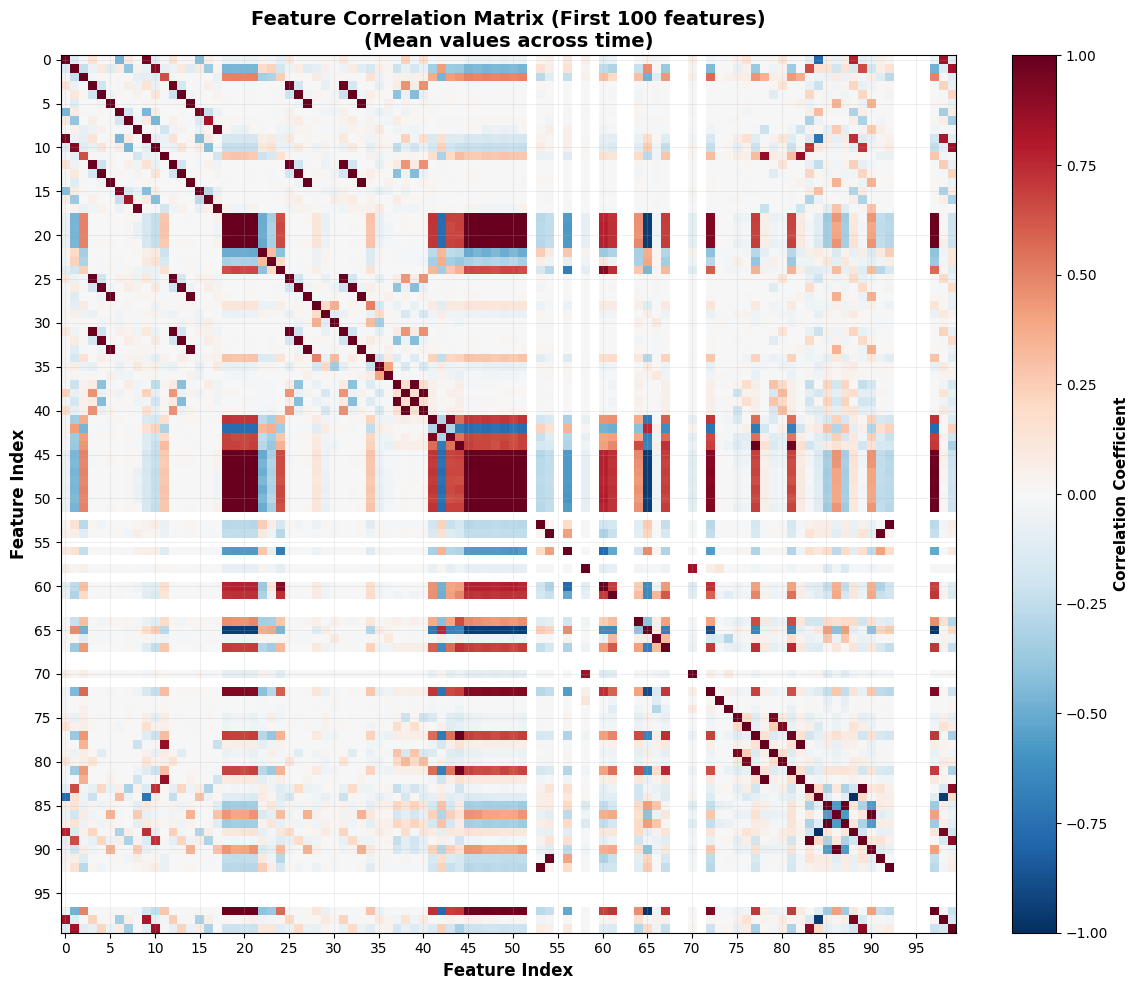


HIGHLY CORRELATED FEATURES (|r| > 0.8)

Found 141 highly correlated feature pairs:
  Feature 18 <-> Feature 51: r = 1.0000
  Feature 19 <-> Feature 49: r = 1.0000
  Feature 20 <-> Feature 47: r = 1.0000
  Feature 21 <-> Feature 45: r = 1.0000
  Feature 83 <-> Feature 89: r = 1.0000
  Feature 84 <-> Feature 88: r = -1.0000
  Feature 85 <-> Feature 87: r = 1.0000
  Feature 86 <-> Feature 90: r = 1.0000
  Feature 53 <-> Feature 92: r = 1.0000
  Feature 44 <-> Feature 77: r = 0.9997
  Feature 14 <-> Feature 33: r = 0.9996
  Feature 5 <-> Feature 27: r = 0.9996
  Feature 21 <-> Feature 46: r = 0.9981
  Feature 45 <-> Feature 46: r = 0.9981
  Feature 27 <-> Feature 33: r = 0.9981
  Feature 5 <-> Feature 14: r = 0.9980
  Feature 19 <-> Feature 50: r = 0.9978
  Feature 49 <-> Feature 50: r = 0.9978
  Feature 14 <-> Feature 27: r = 0.9977
  Feature 5 <-> Feature 33: r = 0.9977
  ... and 121 more pairs

💡 Note: Analyzed 100 features out of 111 total features
✓ Memory cleaned up


In [27]:
# Calculate correlation matrix between features (using mean across time for each sample)
# Compute mean feature values across time dimension
X_mean_over_time = X_windows.mean(axis=1)  # Shape: (n_samples, n_features)

print("="*80)
print("FEATURE CORRELATION ANALYSIS")
print("="*80)
print(f"Computing correlations for {X_mean_over_time.shape[1]} features...")
print(f"Data shape: {X_mean_over_time.shape}")
print(f"Memory required for full correlation matrix: {(X_mean_over_time.shape[1]**2 * 8) / (1024**3):.2f} GB")

# For memory efficiency, analyze only a subset of features or use chunked computation
max_features_corr = 100  # Limit to avoid memory issues

if X_mean_over_time.shape[1] > max_features_corr:
    print(f"\n⚠️  Too many features for full correlation matrix ({X_mean_over_time.shape[1]} features)")
    print(f"Computing correlation for first {max_features_corr} features to avoid memory issues...")
    X_subset = X_mean_over_time[:, :max_features_corr]
else:
    X_subset = X_mean_over_time

# Check and handle NaN values
nan_count = np.isnan(X_subset).sum()
if nan_count > 0:
    print(f"⚠️  Found {nan_count} NaN values, using pandas correlation with NaN handling...")
    # Use pandas to compute correlation with NaN handling
    df_temp = pd.DataFrame(X_subset)
    corr_matrix = df_temp.corr().values
else:
    # Calculate correlation matrix
    print(f"Computing correlation matrix...")
    corr_matrix = np.corrcoef(X_subset.T)

print(f"Correlation matrix shape: {corr_matrix.shape}")

# Visualize correlation matrix
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

im = ax.imshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1, aspect='auto')
ax.set_xlabel('Feature Index', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature Index', fontsize=12, fontweight='bold')
title_suffix = f" (First {max_features_corr} features)" if X_mean_over_time.shape[1] > max_features_corr else ""
ax.set_title(f'Feature Correlation Matrix{title_suffix}\n(Mean values across time)', fontsize=14, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label('Correlation Coefficient', fontsize=11, fontweight='bold')

# Add grid
tick_spacing = max(5, corr_matrix.shape[0] // 20)
ax.set_xticks(np.arange(0, corr_matrix.shape[0], tick_spacing))
ax.set_yticks(np.arange(0, corr_matrix.shape[1], tick_spacing))
ax.grid(True, alpha=0.3, linewidth=0.5)

plt.tight_layout()
plt.show()

# Find highly correlated feature pairs
print("\n" + "="*80)
print("HIGHLY CORRELATED FEATURES (|r| > 0.8)")
print("="*80)

high_corr_pairs = []
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        corr_val = corr_matrix[i, j]
        if not np.isnan(corr_val) and abs(corr_val) > 0.8:
            high_corr_pairs.append((i, j, corr_val))

if high_corr_pairs:
    high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    print(f"\nFound {len(high_corr_pairs)} highly correlated feature pairs:")
    for feat1, feat2, corr in high_corr_pairs[:20]:  # Show top 20
        print(f"  Feature {feat1} <-> Feature {feat2}: r = {corr:.4f}")
    
    if len(high_corr_pairs) > 20:
        print(f"  ... and {len(high_corr_pairs) - 20} more pairs")
else:
    print("\nNo highly correlated feature pairs found (threshold |r| > 0.8)")

# Memory cleanup
print(f"\n💡 Note: Analyzed {corr_matrix.shape[0]} features out of {X_mean_over_time.shape[1]} total features")
del X_subset, corr_matrix
import gc
gc.collect()
print("✓ Memory cleaned up")

# Step 13: Summary Report and Recommendations

In [ ]:
print("="*80)
print("COMPREHENSIVE DATA EXPLORATION SUMMARY")
print("="*80)

# Safely get high_corr_pairs count
try:
    corr_pairs_count = len(high_corr_pairs) if 'high_corr_pairs' in locals() else 'N/A'
except:
    corr_pairs_count = 'N/A'

summary_report = f"""
📊 DATASET OVERVIEW
{'='*80}
• Total samples: {X_windows.shape[0]:,}
• Window length: {X_windows.shape[1]} time steps
• Number of features: {X_windows.shape[2]}
• Total data points: {X_windows.size:,}
• Memory footprint: {X_windows.nbytes / (1024**2):.2f} MB

📋 LABEL DISTRIBUTION
{'='*80}
• Fault classification: {len(np.unique(y_fault))} classes
• Severity levels: {len(np.unique(y_sev))} classes  
• Trajectory types: {len(np.unique(y_type))} classes

⚖️ CLASS BALANCE
{'='*80}
"""

for labels, name in [(y_fault, 'Fault'), (y_sev, 'Severity'), (y_type, 'Trajectory')]:
    unique, counts = np.unique(labels, return_counts=True)
    imbalance = counts.max() / counts.min()
    summary_report += f"• {name}: Imbalance ratio = {imbalance:.2f}"
    if imbalance > 3:
        summary_report += " ⚠️ HIGH\n"
    elif imbalance > 1.5:
        summary_report += " ⚠️ MODERATE\n"
    else:
        summary_report += " ✓ BALANCED\n"

summary_report += f"""
📈 DATA QUALITY
{'='*80}
• Missing values (NaN): {'❌ FOUND' if np.isnan(X_windows).any() else '✓ NONE'}
• Infinite values: {'❌ FOUND' if np.isinf(X_windows).any() else '✓ NONE'}
• Value range: [{X_windows.min():.4f}, {X_windows.max():.4f}]
• Mean: {X_windows.mean():.4f}
• Std deviation: {X_windows.std():.4f}

🔬 FEATURE ANALYSIS
{'='*80}
• Features analyzed: {n_features}
• High-correlation pairs (|r| > 0.8): {corr_pairs_count}

💡 RECOMMENDATIONS FOR MODELING
{'='*80}
"""

recommendations = []

# Check class imbalance
max_imbalance = max([
    (np.unique(y_fault, return_counts=True)[1].max() / np.unique(y_fault, return_counts=True)[1].min()),
    (np.unique(y_sev, return_counts=True)[1].max() / np.unique(y_sev, return_counts=True)[1].min()),
    (np.unique(y_type, return_counts=True)[1].max() / np.unique(y_type, return_counts=True)[1].min())
])

if max_imbalance > 2:
    recommendations.append("1. Use class weights or SMOTE to handle class imbalance")
else:
    recommendations.append("1. Class balance is acceptable, no special handling needed")

# Check correlations safely
try:
    if 'high_corr_pairs' in locals() and len(high_corr_pairs) > 10:
        recommendations.append("2. Consider feature selection or PCA to reduce multicollinearity")
    else:
        recommendations.append("2. Feature correlations are manageable (subset analyzed)")
except:
    recommendations.append("2. Correlation analysis incomplete - recommend feature selection analysis")

# Time series recommendations
recommendations.append("3. Consider LSTM, GRU, or 1D CNN for time series classification")
recommendations.append("4. Experiment with different window sizes if needed")

# Normalization check
if abs(X_windows.mean()) > 0.1 or X_windows.std() < 0.5 or X_windows.std() > 2:
    recommendations.append("5. Data appears normalized/scaled - verify normalization strategy")
else:
    recommendations.append("5. Data normalization looks good")

recommendations.append("6. Use PCA/t-SNE results to validate model embeddings")
recommendations.append("7. Split data stratified by all three label types for robust evaluation")
recommendations.append("8. Monitor memory usage - dataset is large, use batching for training")

for rec in recommendations:
    summary_report += f"   {rec}\n"

summary_report += f"""
{'='*80}
✅ Data exploration complete! Ready for model development.
{'='*80}
"""

print(summary_report)

COMPREHENSIVE DATA EXPLORATION SUMMARY


MemoryError: Unable to allocate 1.65 GiB for an array with shape (19923, 100, 111) and data type float64